In [1]:
# importing requird libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Otto Group Product Classification Challenge\train.csv')

df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
df.shape

(61878, 95)

In [4]:
df.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [5]:
df = df.drop(['id'], axis = 1)

In [6]:
df['target'].unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

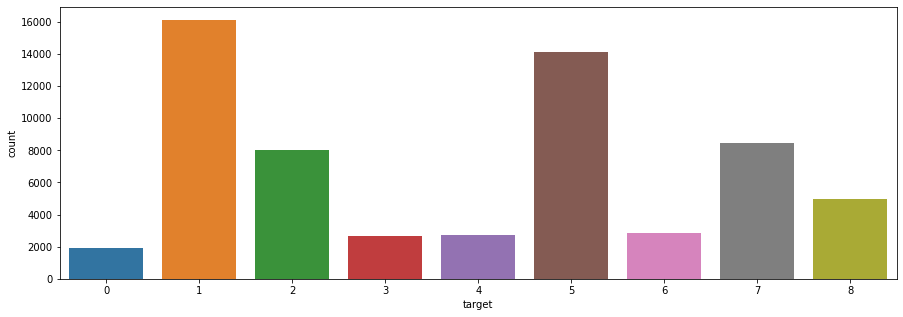

In [8]:
plt.figure(figsize = (15, 5))
sns.countplot(df['target'])

here we can observe that classes 1,5, and 7 dominates

In [9]:
# preparing traininh and testing set
x = df.drop(['target'], axis = 1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_list = []
model_score = []
def classifier(str, model, x, y):
    
    # preparing train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

    # training and making prediction
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    score = accuracy_score(y_test, pred)
    model_list.append(str)
    model_score.append(score)
    
    # ploting the score
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(15, 6)
    sns.countplot(pred, ax = axes[0])
    sns.countplot(y_test, ax = axes[1])

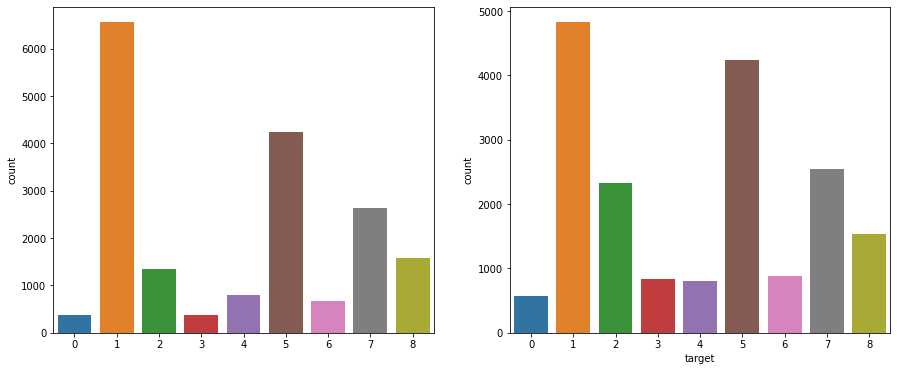

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 100000)
# name = Logistic Regression
classifier('logistic regression', lr, x, y)

from the above plots we can point out that the model mainly predicted the dominant classes i.e 1,7 and 5

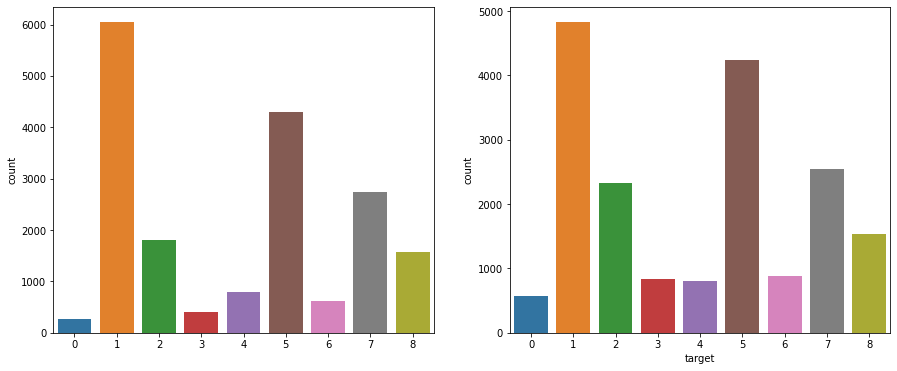

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier('Random Forest Classifier', rfc, x, y)

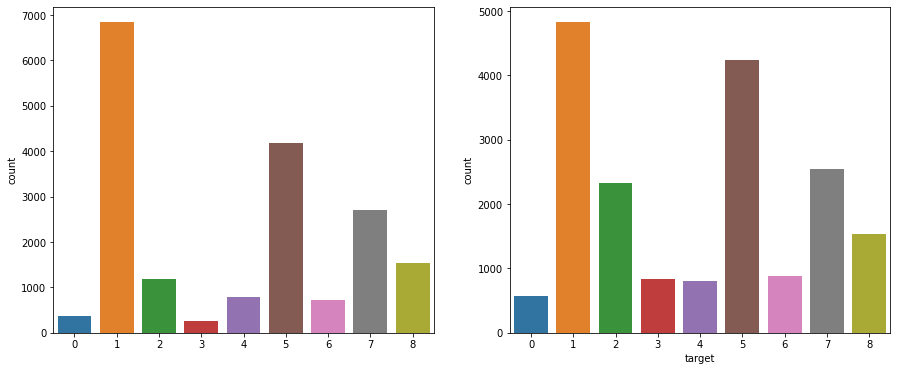

In [13]:
from sklearn.svm import SVC
svm=SVC()
classifier('SVM', svm, x, y)

[11:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


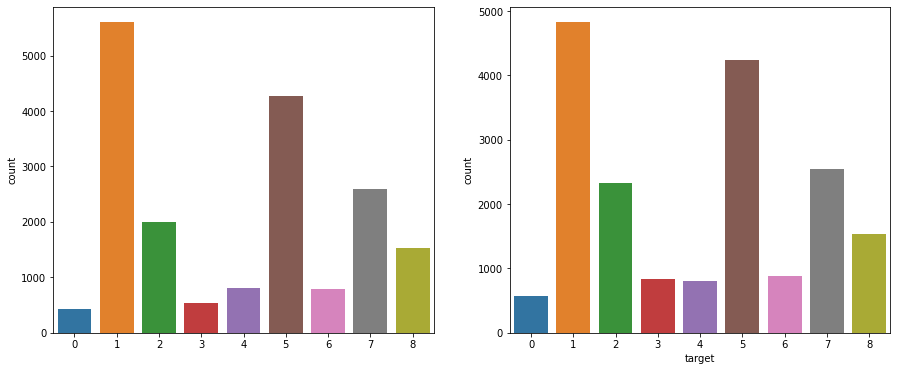

In [14]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
classifier('XGB Classifier', xgb, x, y)

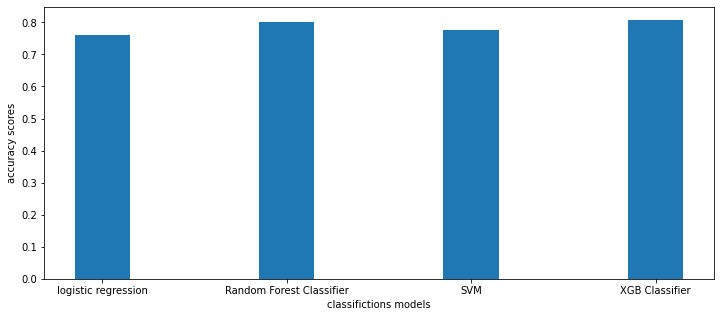

In [15]:

plt.figure(figsize=(12,5))
plt.bar(model_list,model_score,width=0.3)
plt.xlabel('classifictions models')
plt.ylabel('accuracy scores')
plt.show()

In [17]:
for i in range(len(model_list)):
    print(f'{model_list[i]} : {model_score[i]}')

logistic regression : 0.7597500538677009
Random Forest Classifier : 0.8019284636931696
SVM : 0.77650290885585
XGB Classifier : 0.8076384399913812
